In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
objects_table_blue = Table.read('NGC5053_blue_stars.txt', format='ascii')
objects_table_red = Table.read('NGC5053_red_stars.txt', format='ascii')



Matching objects using coordinates

In [3]:
# this makes an empty table, to be filled with x, y, flux values from both red & blue data
objects_in_both = Table(names=['x_blue', 'x_red',
                               'y_blue', 'y_red', 
                               'flux_blue', 'flux_red'])

In [4]:
# overall point: is to fill out the new table: "Objects_in_both", with data from red & blue tables

# defining a variable to be used later
max_distance = 1 # the measured centers of the stars must be less than 1 pixel apart

# this might take a bit of time!

# loop through every row in blue data table
for blue_row in objects_table_blue:
    #defining variables from values in tables
    x_blue, y_blue = blue_row['x'], blue_row['y']
    #look at red row, and check if it's the "same"
    for red_row in objects_table_red:
        # x and y coordinates of red data, is the current row
        x_red, y_red = red_row['x'], red_row['y']
        # the distance between the "blue star" and the "red star"
        distance = ((x_blue - x_red)**2 + (y_blue - y_red)**2)**0.5
        # if the distance between the red point and the blue data point is small (< one pixel),
        # then we know they're in the same location, and are the same star
        # in this case, we'll add both the red data and the blue data to the "objects_in_both" table
        if distance < max_distance:
            flux_blue = blue_row['flux']
            flux_red = red_row['flux']
            objects_in_both.add_row([x_blue, x_red, y_blue, y_red, flux_blue, flux_red])
            
objects_in_both


x_blue,x_red,y_blue,y_red,flux_blue,flux_red
float64,float64,float64,float64,float64,float64
6356.074318659438,6356.001671806257,1501.3421922882203,1501.2606801801687,180.36568945359443,93.38640003226703
6808.407085244977,6808.418175798572,1521.2293240231875,1521.256245375774,444.31475181799374,294.9432906533777
6540.271370888803,6540.368766171109,1539.9356386079978,1540.0942293089388,135.33697815768429,1089.8996389155086
6384.325726798056,6383.702154132282,1539.9898952820413,1540.215080984274,18930.357132782643,14397.144211499397
6736.685431000202,6736.51205988783,1556.9976034998679,1557.0048275718445,70.9457780330628,57.43600042134523
6979.07551001771,6979.1184717151245,1554.9886184576033,1555.032052055565,325.00053143665195,222.45235596343878
6618.248951977518,6618.370665808428,1557.7846280651277,1557.6612262202182,147.70915632702415,97.55484412301324
6823.190767802194,6823.238418435655,1596.221832765779,1596.2811513067352,297.44844459507596,201.00337844066325
5895.209232342607,5895.231296930952,1620.4355908930959,1620.431596794833,376.57493403170247,283.90026740696294


## Converting flux to magnitudes

The system that most observational astronomers use to indicate brightness is called the [magnitude system](https://en.wikipedia.org/wiki/Magnitude_%29astronomy%29). Because nothing can ever be intuitive, the magnitude system runs backwards: a star with magnitude 1 is **brighter** than a star with magnitude 6. How much brighter? In addition to being backwards, magnitudes are *logarithmic*: a star with magnitude 1 is 100 times brighter than a star with magnitude 6, and a star with magnitude 6 is five times brighter than a star with magnitude 8. Makes sense, right?

So, what we've measured is *flux*: the amount of light per unit time that reaches us from a source. How do we turn it into magnitudes?

Mathematically, here's what this looks like. The apparent magnitude of a source, $m$, is related to the measured flux, $F$, as follows:

<center>$m = -2.5\log_{10} (F) - Z$</center>

where $Z$ is a "zeropoint" that's specific to an individual imaging system (that is, the combination of the telescope mirror, detector, and filter—these all affect the measured image fluxes in different ways).

In [5]:
zpt_blue = 26.418
zpt_red = 25.527

mag_blue = -2.5*np.log10(objects_in_both['flux_blue']) + zpt_blue
mag_red = -2.5*np.log10(objects_in_both['flux_red']) + zpt_red

In [6]:
objects_in_both['mag_blue'] = mag_blue
objects_in_both['mag_red'] = mag_red

objects_in_both

x_blue,x_red,y_blue,y_red,flux_blue,flux_red,mag_blue,mag_red
float64,float64,float64,float64,float64,float64,float64,float64
6356.074318659438,6356.001671806257,1501.3421922882203,1501.2606801801687,180.36568945359443,93.38640003226703,20.777615184420963,20.601290914911836
6808.407085244977,6808.418175798572,1521.2293240231875,1521.256245375774,444.31475181799374,294.9432906533777,19.79877316846885,19.352653696697388
6540.271370888803,6540.368766171109,1539.9356386079978,1540.0942293089388,135.33697815768429,1089.8996389155086,21.089458811985708,17.93353372824914
6384.325726798056,6383.702154132282,1539.9898952820413,1540.215080984274,18930.357132782643,14397.144211499397,15.725102981818749,15.131309112849763
6736.685431000202,6736.51205988783,1556.9976034998679,1557.0048275718445,70.9457780330628,57.43600042134523,21.79068361050571,21.12903952495306
6979.07551001771,6979.1184717151245,1554.9886184576033,1555.032052055565,325.00053143665195,222.45235596343878,20.138289822169607,19.658907475840607
6618.248951977518,6618.370665808428,1557.7846280651277,1557.6612262202182,147.70915632702415,97.55484412301324,20.994481456049037,20.55387790168951
6823.190767802194,6823.238418435655,1596.221832765779,1596.2811513067352,297.44844459507596,201.00337844066325,20.234470744318894,19.76899160737158
5895.209232342607,5895.231296930952,1620.4355908930959,1620.431596794833,376.57493403170247,283.90026740696294,19.978371478283847,19.39408549602497


NameError: name 'OIB' is not defined

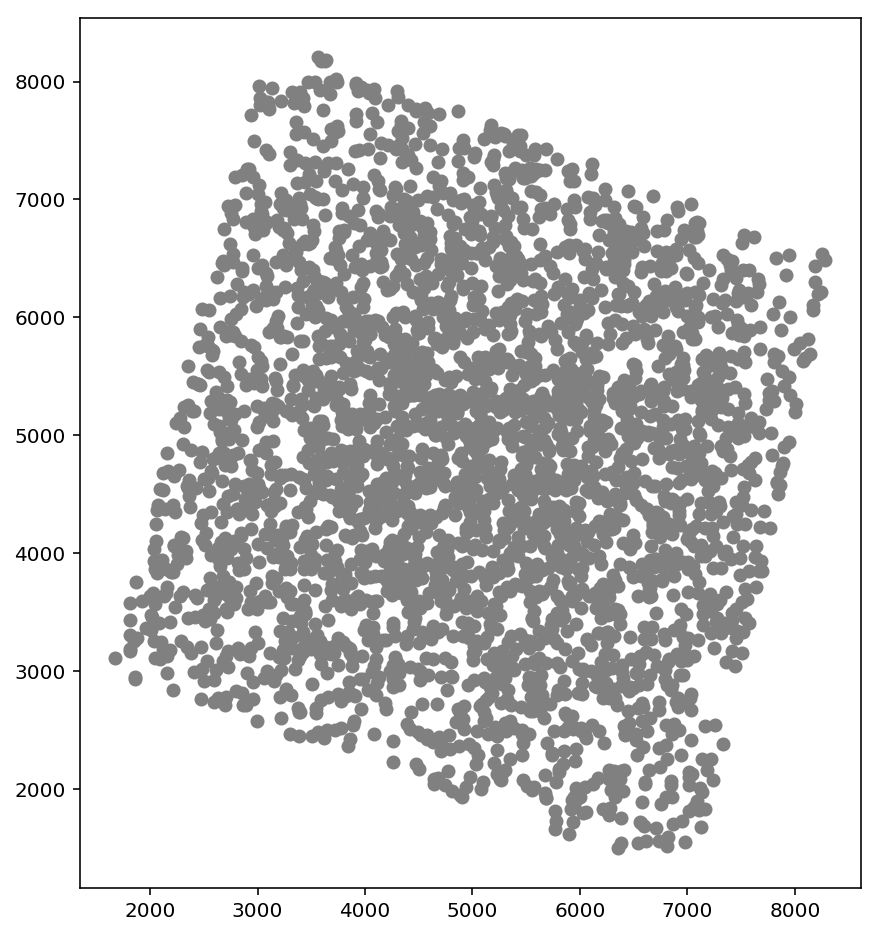

In [7]:
fig, ax = plt.subplots(1, figsize=(7,8))
x_red = objects_in_both['x_red']
x_blue = objects_in_both['x_blue']
y_red = objects_in_both['y_red']
y_blue = objects_in_both['y_blue']
ax.scatter(x_red, y_red, c='gray')
Mask6 = (OIB>0.3)&(OIB<0.4)&(magR<20)&(magR>18)
#main sequence stars cont'd
ax.scatter(x_red[Mask6], y_red[Mask6], c='cyan')

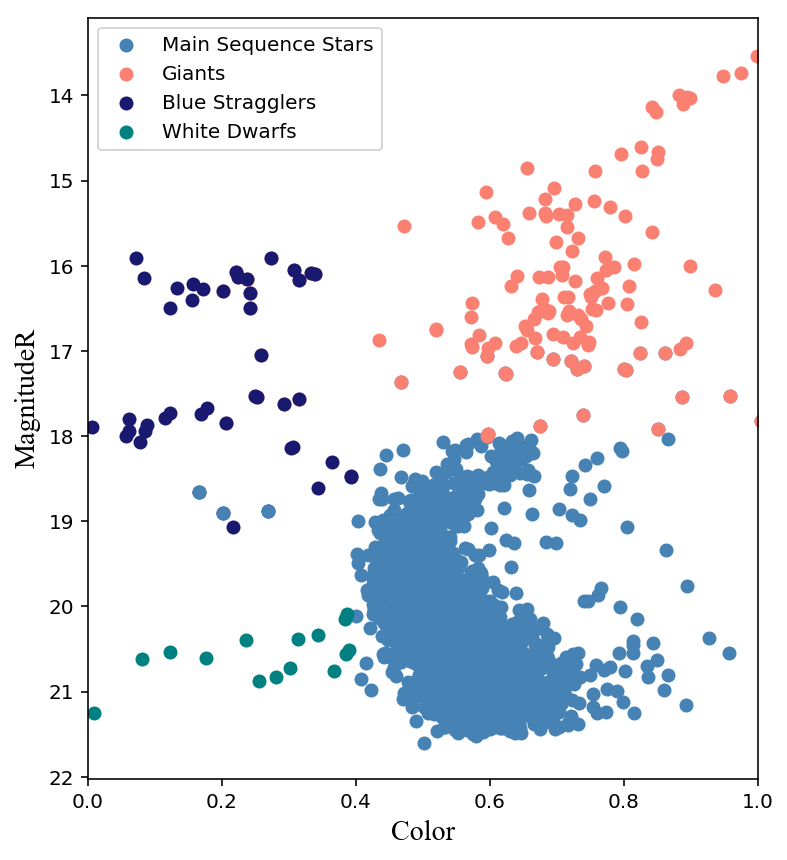

In [8]:
fig, ax = plt.subplots(1, figsize=(6,7))
OIB = (objects_in_both['mag_blue']-objects_in_both['mag_red'])
#OIB = np.array([0.446215224, 0.593793679, 0.479386708, 0.0710102475, 0.534153495, 0.718122146, 0.439912988, 0.632626193, 0.695547726, -0.226041967, 0.579213846, 0.462160324, 0.478997344, 0.425612483, 0.794588419, 0.516331405, 0.655221501, 0.534422077, 0.655221501, 0.666050195, 0.540872664])
#OIB = np.array(objects_in_both['mag_blue']-objects_in_both['mag_red'])
#ax.scatter(OIB, magR, c='green')
magR = (objects_in_both['mag_red'])
Mask = (OIB>0.4)&(magR>17)
#main sequence stars
ax.scatter(OIB[Mask], magR[Mask], c='steelblue', label = "Main Sequence Stars")
Mask2 = (OIB>0.2)&(magR>13)&(magR<18)
#giants
ax.scatter(OIB[Mask2], magR[Mask2], c='salmon', label = "Giants")
#Mask3 = (OIB>0.77)&(OIB<1)&(magR>20)
#outside stars
#ax.scatter(OIB[Mask3], magR[Mask3], c='black', label = "Outside Stars")
Mask4 = (OIB>0)&(OIB<0.4)&(magR<19.2)
#blue stragglers
ax.scatter(OIB[Mask4], magR[Mask4], c='midnightblue', label = "Blue Stragglers")
Mask5 = (OIB<0.4)&(magR>20)
# White Dwarfs
ax.scatter(OIB[Mask5], magR[Mask5], c='teal', label = "White Dwarfs")
#Other outside stars
#r_red = np.sqrt((x_red-5000)**2 + (y_red-5000)**2)
#Mask6 = (r_red>3500)
#ax.scatter(OIB[Mask6], magR[Mask6], color ='thistle', label = "Outside Stars")
Mask7 = (OIB>0.15)&(OIB<0.27)&(magR>18.3)&(magR<19)
#Main Sequence cont'd
ax.scatter(OIB[Mask7], magR[Mask7], c='steelblue', label = None)
ax.set_xlabel('Color', fontname = "Times New Roman", fontsize = 14)
ax.set_ylabel('MagnitudeR', fontname = "Times New Roman", fontsize = 14)
ax.set_xlim(0.0, 1.0)
ax.invert_yaxis()
ax.legend()
plt.savefig("HertzsprungRusselDiagram.png", dpi = 300)
#ax.invert_xaxis()



In [ ]:
Color = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
Color

In [ ]:
Color[Color<0.4]

## How did we do?

We have a reference catalog at hand, NGC5053_reference_catalog.txt, with high-quality photometry that we can compare our results to.

In [ ]:
objects_ref = Table.read('NGC5053_reference_catalog.txt', format='ascii')
objects_ref

In [ ]:
fig, ax = plt.subplots(1, figsize=(7,8))
ax.scatter(objects_ref['mag_blue']-objects_ref['mag_red'], objects_ref['mag_red'])
ax.set_xlabel('Color')
ax.set_ylabel('Magnitude (Red)')
ax.invert_yaxis()